# Exercise: t-SNE visualization of Amazon reviews with polarity based color-coding

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle



# using the SQLite Table to read data.
con = sqlite3.connect('./final_assignment.sqlite')

#final = pd.read_sql_query(""" SELECT * FROM Reviews""", con) 
f1=pd.read_sql_query("""select * from Reviews where Score='positive' limit 2000""",con)
f2=pd.read_sql_query("""select * from Reviews where Score='negative' limit 2000""",con)
frames = [f1, f2]
final = pd.concat(frames)
labels = final['Score']
#print(f1.shape)
print(final.shape)
#print(final)

(4000, 12)


## Bag of words

In [3]:

from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer()
final_count=vect.fit_transform(final['CleanedText'].values)
print(final_count.shape)
print(final['Score'].values)
#print(final_count)
#type(final_count)
#print(final_count.toarray(order='F'))
#print(array)

(4000, 9673)
['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [4]:
final['Score'].value_counts()

positive    2000
negative    2000
Name: Score, dtype: int64

In [5]:
final.iloc[2]

index                                                                138689
Id                                                                   150507
ProductId                                                        0006641040
UserId                                                       A1S4A3IQ2MU7V4
ProfileName                                           sally sue "sally sue"
HelpfulnessNumerator                                                      1
HelpfulnessDenominator                                                    1
Score                                                              positive
Time                                                             1191456000
Summary                                       chicken soup with rice months
Text                      This is a fun way for children to learn their ...
CleanedText               this fun way for children learn their month th...
Name: 2, dtype: object

In [6]:
standardized_data = StandardScaler(with_mean=False).fit_transform(final_count)
print(final_count.shape)
type(final_count)
#print(final_count)
#dir(standardized_data)


(4000, 9673)


scipy.sparse.csr.csr_matrix

[[  1.608992   -1.3965522]
 [  3.7587304  -2.3817556]
 [-30.253014   48.069817 ]
 ...
 [-16.800291   28.084206 ]
 [-25.116232   -4.255746 ]
 [  9.906865   -5.5673566]]
[[1.6089919805526733 -1.3965522050857544 'positive']
 [3.758730411529541 -2.3817555904388428 'positive']
 [-30.253013610839844 48.06981658935547 'positive']
 ...
 [-16.800291061401367 28.084205627441406 'negative']
 [-25.11623191833496 -4.255745887756348 'negative']
 [9.906865119934082 -5.567356586456299 'negative']]


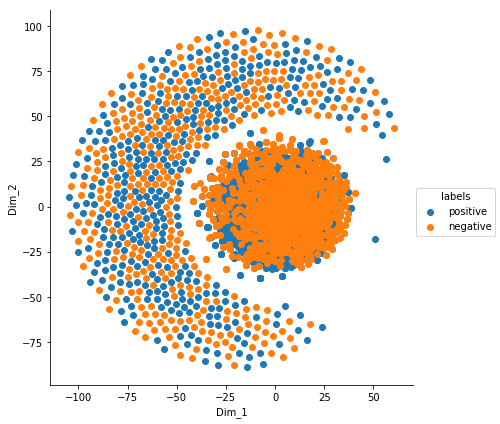

In [8]:

standardized_data = standardized_data.toarray()

model = TSNE(n_components=2, random_state=0, perplexity=30)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 2500

tsne_data = model.fit_transform(standardized_data)

print(tsne_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

###### without standardizing the data using BOW technique

[[ -1.4636761  10.761173 ]
 [ 15.07236   -12.649228 ]
 [-20.971561   13.987233 ]
 ...
 [  5.518671   29.645685 ]
 [-16.83264     9.906399 ]
 [  5.094336   19.191877 ]]
[[-1.46367609500885 10.761173248291016 'positive']
 [15.072360038757324 -12.6492280960083 'positive']
 [-20.971561431884766 13.98723316192627 'positive']
 ...
 [5.518671035766602 29.64568519592285 'negative']
 [-16.832639694213867 9.90639877319336 'negative']
 [5.094336032867432 19.191877365112305 'negative']]


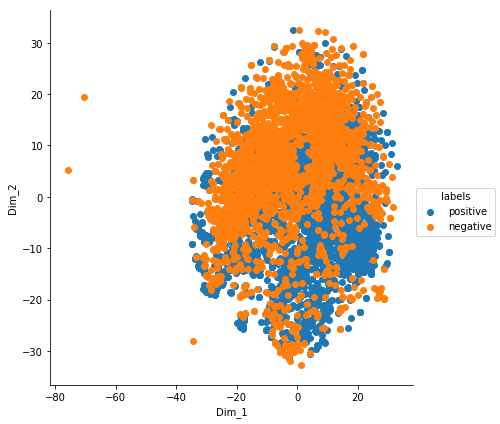

In [9]:

final_count = final_count.toarray()

model = TSNE(n_components=2, random_state=0, perplexity=30)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 2500

tsne_data = model.fit_transform(final_count)

print(tsne_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

###### standard scalar with mean = true (by default)

In [10]:
standardized_data = StandardScaler().fit_transform(final_count)
print(final_count.shape)
type(final_count)
#print(final_count)
#print(standardized_data)

(4000, 9673)


numpy.ndarray

[[  1.7215693  -1.0040932]
 [  1.3784524  -3.0624068]
 [-34.959766   50.153126 ]
 ...
 [-12.544454   22.275259 ]
 [-26.401268   -0.9279761]
 [ 10.633361   -5.6795554]]
[[1.721569299697876 -1.0040931701660156 'positive']
 [1.3784524202346802 -3.0624067783355713 'positive']
 [-34.95976638793945 50.15312576293945 'positive']
 ...
 [-12.544453620910645 22.275259017944336 'negative']
 [-26.401268005371094 -0.9279760718345642 'negative']
 [10.633360862731934 -5.679555416107178 'negative']]


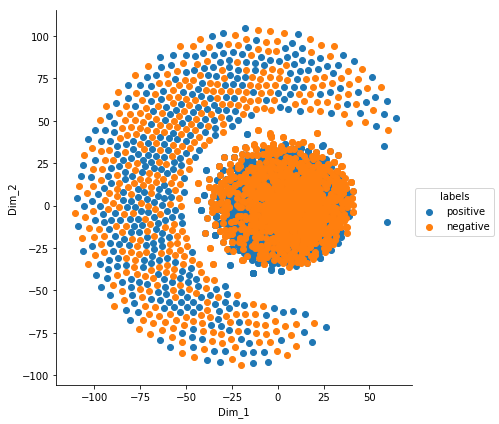

In [11]:
#standardized_data = standardized_data.toarray()

model = TSNE(n_components=2, random_state=0, perplexity=30)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 2500

tsne_data = model.fit_transform(standardized_data)

#print(tsne_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
#print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## TF-IDF

In [12]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (4000, 9673)
the number of unique words including both unigrams and bigrams  9673


In [13]:
standardized_data = StandardScaler(with_mean=False).fit_transform(final_tf_idf)

print(standardized_data.shape)

(4000, 9673)


[[  0.72706455  -0.27631766]
 [-16.146803    15.333697  ]
 [-18.18365      5.9109106 ]
 ...
 [ -2.546685    23.383781  ]
 [ 32.577286    -3.2312617 ]
 [ -4.670726     6.3647084 ]]
[[0.7270645499229431 -0.27631765604019165 'positive']
 [-16.14680290222168 15.333697319030762 'positive']
 [-18.18364906311035 5.910910606384277 'positive']
 ...
 [-2.546684980392456 23.38378143310547 'negative']
 [32.57728576660156 -3.231261730194092 'negative']
 [-4.6707258224487305 6.364708423614502 'negative']]


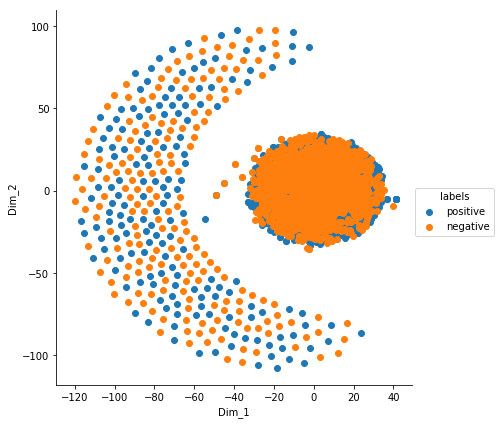

In [14]:
standardized_data = standardized_data.toarray()

model = TSNE(n_components=2, random_state=0, perplexity=30)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 2500

tsne_data = model.fit_transform(standardized_data)

#print(tsne_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
#print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

### TFIDF with ngram

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (4000, 136448)
the number of unique words including both unigrams and bigrams  136448
(4000, 136448)
[[-2.416903   -7.7779984 ]
 [ 1.6309327  -4.73209   ]
 [ 6.3649683   2.3417523 ]
 ...
 [ 2.5512366   8.056922  ]
 [ 0.12361106 -0.2938019 ]
 [ 0.12345584 -0.28240347]]
[[-2.416903018951416 -7.777998447418213 'positive']
 [1.6309326887130737 -4.732089996337891 'positive']
 [6.364968299865723 2.341752290725708 'positive']
 ...
 [2.551236629486084 8.05692195892334 'negative']
 [0.12361105531454086 -0.2938019037246704 'negative']
 [0.12345584481954575 -0.28240346908569336 'negative']]


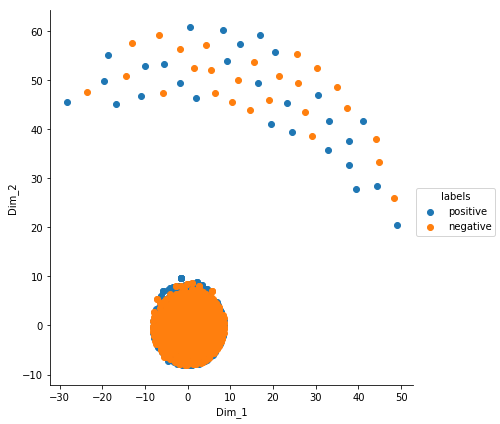

In [15]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

standardized_data = StandardScaler(with_mean=False).fit_transform(final_tf_idf)

print(standardized_data.shape)

standardized_data = standardized_data.toarray()

model = TSNE(n_components=2, random_state=0, perplexity=50)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 2500

tsne_data = model.fit_transform(standardized_data)

#print(tsne_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
#print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

### W2V

In [16]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [17]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

print(w2v_model)
w2v_words = list(w2v_model.wv.vocab)

Word2Vec(vocab=3341, size=50, alpha=0.025)


## Avg w2v

In [18]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

4000
50


In [19]:
standardized_data = StandardScaler(with_mean=False).fit_transform(sent_vectors)

print(standardized_data.shape)

(4000, 50)


[[ 26.224573  -39.727577 ]
 [-21.298061   -8.0774145]
 [-38.128513  -23.21013  ]
 ...
 [ 34.887585  -15.941203 ]
 [ 55.653572  -25.97419  ]
 [ 45.415806   25.94717  ]]
[[26.224573135375977 -39.727577209472656 'positive']
 [-21.29806137084961 -8.077414512634277 'positive']
 [-38.12851333618164 -23.21013069152832 'positive']
 ...
 [34.8875846862793 -15.941203117370605 'negative']
 [55.65357208251953 -25.97418975830078 'negative']
 [45.41580581665039 25.94717025756836 'negative']]


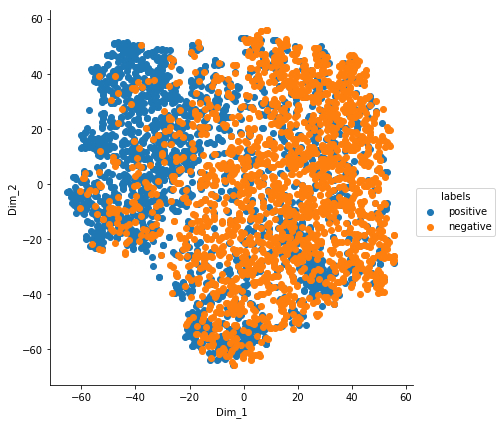

In [20]:
#standardized_data = standardized_data.toarray()

model = TSNE(n_components=2, random_state=0, perplexity=30)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 2500

tsne_data = model.fit_transform(standardized_data)

#print(tsne_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
#print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

## Tf-Idf w2v

In [21]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [22]:
#print(tfidf_sent_vectors)

In [23]:
standardized_data = StandardScaler(with_mean=False).fit_transform(tfidf_sent_vectors)

print(standardized_data.shape)

(4000, 50)


[[ 46.2837      0.7499247]
 [-14.300772   -9.391943 ]
 [-16.711483  -21.211536 ]
 ...
 [ 54.08853     8.228077 ]
 [ 31.355648  -34.87705  ]
 [ 25.045681   37.820168 ]]
[[46.28369903564453 0.7499247193336487 'positive']
 [-14.300771713256836 -9.391942977905273 'positive']
 [-16.711483001708984 -21.211536407470703 'positive']
 ...
 [54.088531494140625 8.228076934814453 'negative']
 [31.355648040771484 -34.87704849243164 'negative']
 [25.04568099975586 37.820167541503906 'negative']]


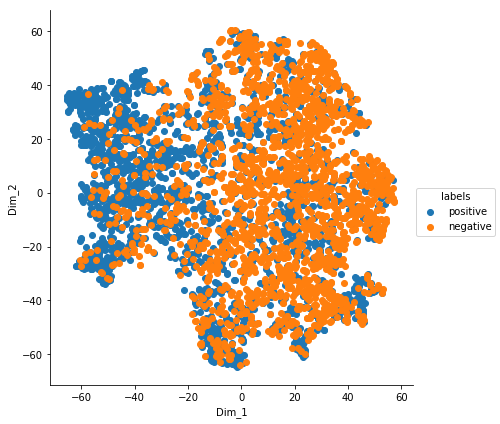

In [24]:
#standardized_data = standardized_data.toarray()

model = TSNE(n_components=2, random_state=0, perplexity=30)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 2500

tsne_data = model.fit_transform(standardized_data)

#print(tsne_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
#print(tsne_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()